In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [47]:
test_dataset = pd.read_csv('C:/Users/HP/Documents/Test Dataset.csv')
train_data = pd.read_csv('C:/Users/HP/Documents/Train Dataset .csv')

In [48]:
train_data.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [49]:
train_data.describe()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [51]:
# Check for missing values
print("Missing values in train data:\n", train_data.isnull().sum())
print("Missing values in test data:\n", test_dataset.isnull().sum())

Missing values in train data:
 Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Missing values in test data:
 id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [52]:
# Handle missing values (if any)
train_data.fillna(train_data.mean(), inplace=True)
test_dataset.fillna(test_dataset.mean(), inplace=True)

In [53]:
# Rename the proper case columns to lowercase
train_data.rename(columns={'Sex': 'sex'}, inplace=True)
train_data.rename(columns={'Id': 'id'}, inplace=True)
train_data.rename(columns={'Age': 'age'}, inplace=True)

# Save the modified DataFrame back to a CSV file
train_data.to_csv('your_file_lowercase.csv', index=False)

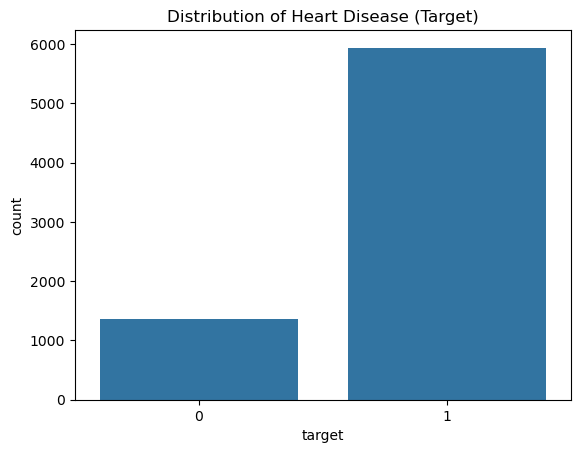

In [54]:
# Visualizing the target variable distribution
sns.countplot(x='target', data=train_data)
plt.title("Distribution of Heart Disease (Target)")
plt.show()

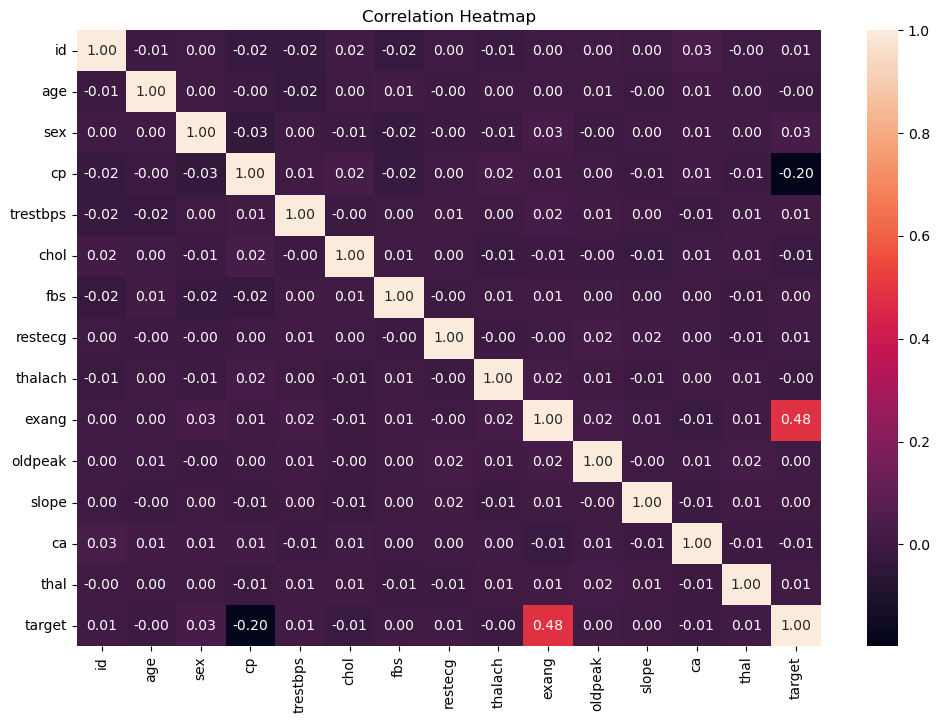

In [55]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [56]:
# Encoding 'sex', 'cp', 'restecg', 'slope', 'thal' if they are categorical
label_encoder = LabelEncoder()

categorical_columns = ['sex', 'cp', 'restecg', 'slope']
for col in categorical_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_dataset[col] = label_encoder.transform(test_dataset[col])

In [57]:
# Split the training data into features and target variable
X = train_data.drop('target', axis=1)
Y = train_data['target']

In [58]:
# Split data: 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [59]:
# Feature scaling (optional but recommended for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_data_scaled = scaler.transform(test_dataset)  # Scale the test data as well

In [60]:
# We'll use RandomForestClassifier as an example
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [61]:
# 7. Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# 8. Use trained model to predict on validation and test datasets
val_predictions = model.predict(X_val)
test_predictions = model.predict(test_data_scaled)

In [63]:
# Evaluate the model performance on the validation set
print("Validation Accuracy:", accuracy_score(y_val, val_predictions))
print("Classification Report:\n", classification_report(y_val, val_predictions))

Validation Accuracy: 0.8179329226557153
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.39      0.43       260
           1       0.87      0.91      0.89      1201

    accuracy                           0.82      1461
   macro avg       0.68      0.65      0.66      1461
weighted avg       0.80      0.82      0.81      1461



In [64]:
# Save the trained model
joblib.dump(model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']

In [65]:
print("Model training and prediction completed.")

Model training and prediction completed.


In [66]:
# Ensure 'id' exists in test data
if 'id' not in test_dataset.columns:
    test_dataset['id'] = test_dataset.index  # Create an 'id' if not available

# Use trained model to predict on test dataset
test_predictions = model.predict(test_data_scaled)

# Save submission file with predictions in the exact same order as 'id' column in test_data
submission = pd.DataFrame({
    'id': test_dataset['id'],  # Use the 'id' column in the original order from test_data
    'target': test_predictions
})

# Save the submission file without any sorting
submission.to_csv('submission3.csv', index=False)

print("Submission file created with 'id' in the original order as in the test dataset.")


Submission file created with 'id' in the original order as in the test dataset.


In [67]:
submission

,id,target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,1
...,...,...
2692,14964,1
2693,16774,1
2694,18884,1
2695,10000,1
